<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Thanks for taking the time to improve the project! It is now accepted. Good luck on the next sprint!

</div>

**Review**

Hello Aryslan!

I'm happy to review your project today.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a pretty good job on modeling, but there are some issues with profit distribution estimation that need to be corrected before the project is accepted. Let me know if you have questions!

Title:
    
Identifying the Optimal Region for New Oil Well Development

Introduction:

In the competitive and capital-intensive oil mining industry, making informed decisions about where to develop new wells is crucial for maximizing returns and minimizing financial risks. The OilyGiant mining company aims to leverage data-driven approaches to identify the optimal region for the development of a new oil well. This report presents a comprehensive analysis using machine learning models to predict oil well productivity and the bootstrapping technique to assess potential profit and associated risks across three distinct regions.

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression

- Download and prepare the data. Explain the procedure.


In [2]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Remove the extra (id) column and collect into one list

In [3]:
data_all = [
    data_0.drop('id', axis=1),
    data_1.drop('id', axis=1),
    data_2.drop('id', axis=1),
]

Target distribution

In [4]:
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [5]:
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [6]:
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


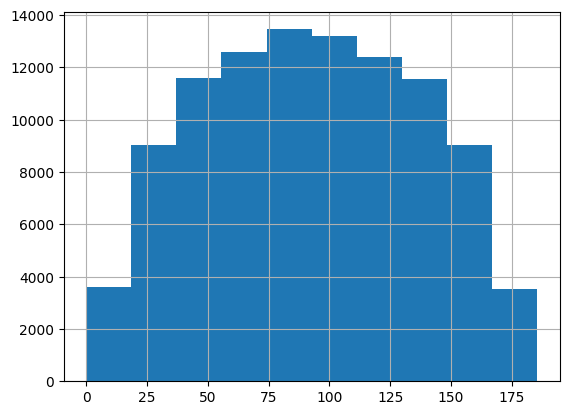

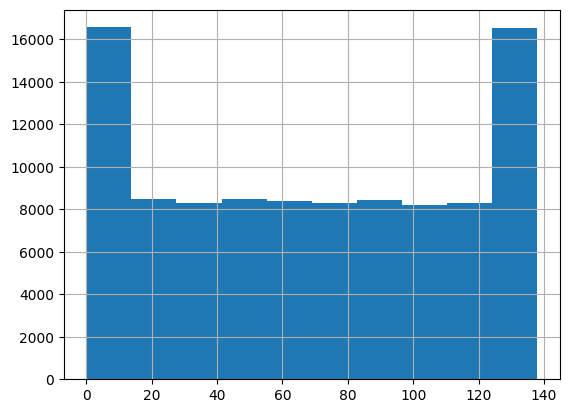

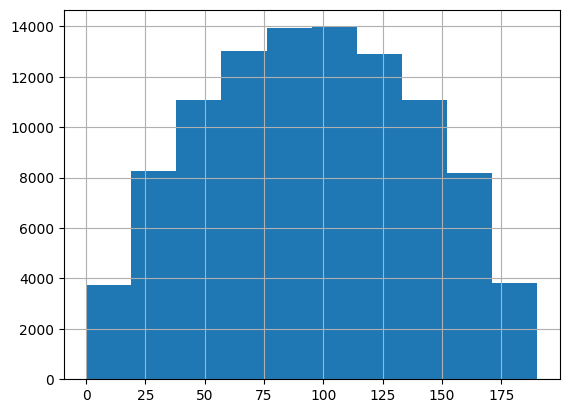

In [7]:
for data in data_all:
    plt.figure()
    data['product'].hist()
  

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was loaded and inspected

</div>

- Training and testing the model for each region:

In [8]:
features = data.drop('product', axis=1)
target = data['product']

features_train, features_val, target_train, target_val = train_test_split(
        features, target, test_size=0.25, random_state=42)
    
features_train.shape, features_val.shape, target_train.shape, target_val.shape

((75000, 3), (25000, 3), (75000,), (25000,))

In [9]:
state = np.random.RandomState(42)

samples_target = []
samples_predictions = []
for region in range(len(data_all)):
    data = data_all[region]
    features = data.drop('product', axis=1)
    target = data['product']
    features_train, features_val, target_train, target_val = train_test_split(
        features, target, test_size=0.25, random_state=42)
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_val)
    
    samples_target.append(target_val.reset_index(drop=True))
    samples_predictions.append(pd.Series(predictions))
    
    mean_product = target.mean()
    model_rmse = mean_squared_error(target_val, predictions)**0.5
    
    print("--Region", region, "--")
    print("mean product amount =", mean_product)
    print("Model RMSE:", model_rmse)
    print()

--Region 0 --
mean product amount = 92.50000000000001
Model RMSE: 37.756600350261685

--Region 1 --
mean product amount = 68.82500000000002
Model RMSE: 0.890280100102884

--Region 2 --
mean product amount = 95.00000000000004
Model RMSE: 40.14587231134218



<div class="alert alert-success">
<b>Reviewer's comment</b>

The data for each region was split into train and validation sets, the models were trained and evaluated correctly

</div>

- Preparing for profit calculation

In [10]:
Budget = 100_000_000
Revenue_per_unit = 4500
Units_per_budget = Budget // Revenue_per_unit

Product_price = 45

def profit(target, predictions):
    predictions_sorted = pd.Series(predictions).sort_values(ascending=False)
    selected_units = target[predictions_sorted.index] [:200]
    product = selected_units.sum()
    revenue = product * Revenue_per_unit
    price = Budget
    return revenue - price

<div class="alert alert-danger">
<b>Reviewer's comment</b>

Profit calculation function is not quite correct: 
    
1. Our budget is for developing 200 wells. So, after sorting the wells by predictions, you need to select the best 200 wells (that is not the value your `Units_per_budget` variable contains).
    
2. The amount of proiduct in the wells is measured in units of 1000 barrels. To find revenue you need to multiply the total product by `Revenue_per_unit = 4500`, not `Product_price = 45`.

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Ok, fixed!

</div>

In [11]:
profit(target, predictions) 

Price_per_units = Budget / Units_per_budget
zero_profit_product = Revenue_per_unit / Product_price
print("Amount of product for 0 profit:", zero_profit_product)
print("Profit:", profit(target, predictions))

Amount of product for 0 profit: 100.0
Profit: -15914686.494915396


In [12]:
Units_per_budget = Budget // Revenue_per_unit
Units_per_budget

22222

Finding: 
The calculated zero-profit product amount provides a clear benchmark for evaluating the feasibility of new oil well projects. Ensuring that the projected production meets or exceeds this amount is crucial for achieving financial viability and avoiding losses in oil well development initiatives.

<div class="alert alert-danger">
<b>Reviewer's comment</b>

Ok, so what we want to calculate is the average amount of product per well to break even (that is so that revenue would be equal to the costs, i.e. budget). What you calculated in the following line is the total amount of product needed to break even:
    
> Units_per_budget = Budget // Revenue_per_unit
    
Can you find the average amount of product per well needed to break even if we're developing 200 wells? After calculating it, please compare that value to the average predicted amount of product per well in each region.

</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

Alright, so the 22222 figure is the total amount of product from 200 wells required to break even. Then the average is 22222/200 ~= 111. That is higher than the average amount of product in each region, which means that if we simply select the wells to develop randomly we're going to lose money on average, and we actually need our models to select better wells if we hope to make a profit.

</div>

- Calculate risks and profit for each region:

In [13]:
predictions

array([ 98.30191642, 101.59246124,  52.4490989 , ...,  64.09839   ,
        83.76413542,  86.55864415])

In [14]:
Sample_size = 500
Bootstrap_size = 1000

#samples_target = [pd.Series(np.random.rand(1000) * 100) for _ in range(3)]
#samples_predictions = [pd.Series(np.random.rand(1000) * 100) for _ in range(3)]

In [15]:
for region in range(3):
    target = samples_target[region]
    predictions = samples_predictions[region]
    
    profit_values = []
    for i in range(Bootstrap_size):
        target_sample = target.sample(Sample_size, replace=True)
        predictions_sample = predictions[target_sample.index]
        profit_values.append(profit(target_sample, predictions_sample))
    
    profit_values = pd.Series(profit_values)
    
    mean_profit = profit_values.mean()
    confidence_interval = (profit_values.quantile(0.025), profit_values.quantile(0.975))
    negative_profit_chance = (profit_values <0).mean()
    
    print("--Region", region, "--")
    print("Mean profit =", mean_profit)
    print("95% confidence interval:", confidence_interval)
    print("Risk of losses=", negative_profit_chance * 100, "%")
    print()

--Region 0 --
Mean profit = 4203604.300282125
95% confidence interval: (-1104251.6286958347, 9722989.182375599)
Risk of losses= 5.800000000000001 %

--Region 1 --
Mean profit = 4958938.020930194
95% confidence interval: (817034.9595345858, 9273537.675069306)
Risk of losses= 1.4000000000000001 %

--Region 2 --
Mean profit = 3957167.6290754755
95% confidence interval: (-1498442.26506278, 9401867.189307444)
Risk of losses= 8.0 %



<div class="alert alert-danger">
<b>Reviewer's comment</b>

Bootstrapping looks good, except you need to remove `random_state` parameter when sampling, otherwise all 1000 samples will be exactly the same, thus all profits in the list will be the same, and it won't be possible to use them to estimate profit distribution.
    
The code used to calculate statistics of the profit distribution is correct

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

All good now!

</div>

Conclusion:

Using the bootstrapping technique for distribution of profit the analysis found following results. Region 1 is the best choice for developing new oil wells due to its highest mean profit and the lowest risk of financial losses. Region 0 is also a good option, though with a slightly higher risk. Region 2, while still profitable on average, has the highest risk of losses among the three regions and may require more careful consideration before investment.

Recommendation: 
 
Based on the analysis, Region 1 is the best choice for developing new oil wells due to its highest mean profit and lowest risk of financial losses.

<div class="alert alert-danger">
<b>Reviewer's comment</b>

Please check the conclusions after fixing the problems above

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Conclusion makes sense, region choice is correct and justified

</div>